In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

In [8]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()


In [9]:
X = breast.data
print(X.shape)
Y=breast.target
print(Y.shape)

(569, 30)
(569,)


In [10]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
labels = np.reshape(Y,(569,1))

In [12]:
final_breast_data = np.concatenate([X,labels],axis=1)

In [13]:
final_breast_data.shape

(569, 31)

In [14]:
 breast_dataset = pd.DataFrame(final_breast_data)

In [15]:
features = breast.feature_names
features


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
features_labels = np.append(features,'label')


In [17]:

breast_dataset.columns = features_labels

In [18]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [19]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [20]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 455
No. of testing examples: 114


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((455, 1)) 
X_2 = np.ones((114,1))

In [41]:
# Using reshape function convert X 1D array to 2D array of dimension 100X1 
X_1 = X_train.reshape(455,30) 
X_3 = X_test.reshape(114,30)
X_1[:5] 
X_3[:5]

array([[-0.89037814, -0.43178975, -0.82743196, -0.80233407, -0.52261565,
         0.13958185,  0.09759742, -0.31640469, -1.17203903,  0.50665138,
        -0.55016901,  0.33119919, -0.01517662, -0.51620593,  0.48765936,
         1.16469717,  1.05863517,  0.95179305, -0.66559716,  0.42857635,
        -0.80674172,  0.26382994, -0.49967299, -0.71167054,  0.29593345,
         0.99535358,  1.02485777,  0.64478642, -0.58168246,  0.63205886],
       [ 0.32233831,  2.75006849,  0.48504931,  0.19048363,  0.59649932,
         1.98179803,  2.14442516,  1.18624861,  1.11856829,  1.23335798,
        -0.53954977,  0.00920521, -0.24452204, -0.40751707, -0.7965898 ,
         1.27873108,  1.35637279,  0.69654357,  0.06387344,  0.85971051,
         0.27703647,  2.897657  ,  0.66868883,  0.07911193,  0.40979251,
         3.43881648,  4.37368836,  1.86040584,  1.83668735,  3.15616838],
       [-0.9388868 ,  0.70153979, -0.94927266, -0.8356771 , -0.60413585,
        -0.87931123, -0.64787503, -0.88713391,  0

In [42]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X_train = np.hstack((X_0, X_1)) 
X_test = np.hstack((X_2, X_3))

In [61]:
theta = np.zeros(31) 
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  m= X.shape[0]
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [64]:
# Lets compute the cost for theta values 
cost = compute_cost(X_train, Y_train, theta) 
print('The cost for given values of theta_0 =',cost) 

The cost for given values of theta_0 = 0.31758241758241756


In [67]:


def gradient_decsent(X_train, Y_train, X_test, Y_test, lr, n_epochs, lamda =None):
 
  train_losses = []
  test_losses = []
  train_cost_history = np.zeros(n_epochs)
  test_cost_history = np.zeros(n_epochs)
  m=X_train.shape[0]
  for i in range(n_epochs):
      predictions = X_train.dot(theta)
      errors = np.subtract(predictions, Y_train)
      sum_delta = (lr / m) * X_train.transpose().dot(errors);
      theta = theta - sum_delta;
      if lamda==None:
          train_loss = compute_cost(X_train, Y_train, theta)
          train_cost_history[i] = train_loss
      if lamda!=None:
        train_loss = compute_cost_regularized(X_train, y_train, theta, lamda)
        train_cost_history[i] = train_loss
  test_loss = compute_cost(X_test, y_test, theta)
  test_cost_history[i] = test_loss
  if i % 10 == 0:
        print('Epoch %d, Train Loss %f' % (i, float(train_loss)))
        print('Epoch %d, Test Loss %f' % (i, float(test_loss)))
  return theta, train_cost_history, test_cost_history

In [83]:
theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] 
n_epochs = 50; 


In [ ]:
theta, cost_history_a, cost_history_a2 = gradient_decsent(X_train, X_test, Y_train, Y_test,theta, n_epochs=n_epochs, lr=0.00000001) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_a[-1],cost_history_a2[-1]) 

In [25]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [26]:
Y_pred = classifier.predict(X_test)

In [27]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[45,  1],
       [ 0, 68]])

In [28]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, a

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9912280701754386
Precision: 0.9855072463768116
Recall: 1.0


Text(0.5, 257.44, 'Predicted Label')

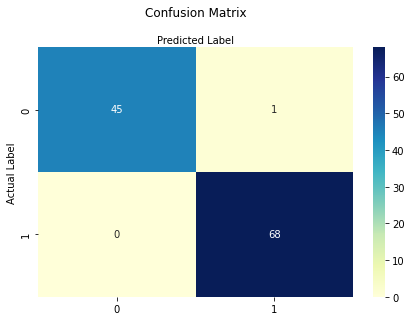

In [29]:
import seaborn as sns
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
C = [10, 1, 0.1, 0.001]

In [32]:
for c in C:
    clf = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training Accuracy:', clf.score(X_train, Y_train))
    print('Test Accuracy:', clf.score(X_test, Y_test))

C: 10
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9824561403508771
C: 1
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771
C: 0.1
Training Accuracy: 0.9758241758241758
Test Accuracy: 0.9736842105263158
C: 0.001
Training Accuracy: 0.3648351648351648
Test Accuracy: 0.40350877192982454


In [33]:
 Y_pred = clf.predict(X_test)

In [34]:

cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix


array([[46,  0],
       [68,  0]])

In [35]:
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print('')

Precision: 0.0
Recall: 0.0



In [36]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, X, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 95.434% (2.737%)


In [37]:
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, X, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 95.432% (3.858%)


In [38]:
C = [10, 1, 0.1, 0.001]

In [39]:
for c in C:
    kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
    model = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    results = cross_val_score(model, X, Y, cv = kfold)
    print('C:', c)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


C: 10
Accuracy: 96.313% (1.951%)
C: 1
Accuracy: 95.609% (2.658%)
C: 0.1
Accuracy: 92.972% (3.232%)
C: 0.001
Accuracy: 91.388% (2.797%)
